In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('Navy Bays_Mushroom Dataset.csv')

In [3]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [4]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [5]:
X = df.drop('poisonous', axis = 1)
y = df['poisonous']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
y_pred = model.predict(X_test)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Accuracy: 1.0
Accuracy: 0.7833846153846153


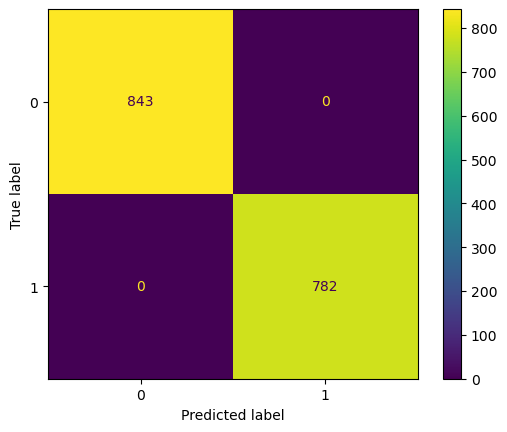

In [11]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

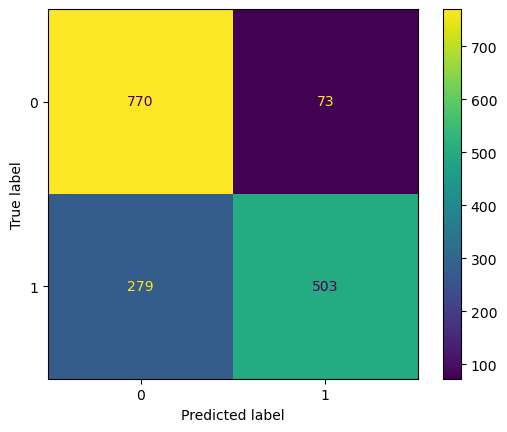

In [16]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb))

In [14]:
cv_nb = cross_val_score(nb, X, y, cv = 5, scoring = 'accuracy').mean()

In [15]:
print(cv_nb)

0.6895599090564607
